In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [2]:
# astros2016 = pd.read_csv("data/HOU2016.csv")
astros2017 = pd.read_csv("data/HOU2017.csv")
# astros2018 = pd.read_csv("data/HOU2018.csv")
astros2019 = pd.read_csv("data/HOU2019.csv")
yankees2017 = pd.read_csv("data/NYY2017.csv")
dodgers2017 = pd.read_csv("data/LAD2017.csv")
redsox2017 = pd.read_csv("data/BOS2017.csv")


In [3]:
def boolhome(df):
    df.dropna(axis="index", how="all", inplace=True, subset=['Gtm'])
    df.rename(columns={"Unnamed: 3":"Home"}, inplace=True)
    df.replace({"Home":{"@": False, np.nan: True}}, inplace=True)
    df.drop("Unnamed: 0", axis=1, inplace=True)
#     df['GmeSc'] = df['Opp. Starter (GmeSc)'].apply(lambda x: x[-3:-1])
    df['GmeSc'] = df['Opp. Starter (GmeSc)'].str.extract('(\d+)')
    df['GmeSc'] = df['GmeSc'].astype(int)
    df['SoAb'] = df['SO'] / df["AB"]
    df['BbAb'] = df['BB'] / df["AB"]
    df.reset_index(drop=True, inplace=True)
#     df['bbsum'] = df["BB"] + df['SO']
    #df['GmeSc'].apply(lambda x: x.astype(int))
    return df

In [4]:
astros2017df = boolhome(astros2017)
# astros2018df = boolhome(astros2018)
astros2019df = boolhome(astros2019)
# astros2016df = boolhome(astros2016)
yankees2017df = boolhome(yankees2017)
dodgers2017df = boolhome(dodgers2017)
redsox2017df = boolhome(redsox2017)

In [5]:
columns = astros2017df.columns

# GROUPBY home/away

In [6]:
#Home vs. Away groupby for top teams 
astros_home_gb = astros2017df.groupby("Home")
# yankees_home_gb = yankees2017df.groupby("Home")
# dodgers_home_gb = dodgers2017df.groupby("Home")
# redsox_home_gb = redsox2017df.groupby("Home")

In [7]:
#Home vs. Away groupby for Astros 2017 and 2019
astros2017_home_gb = astros2017df.groupby("Home")
astros2019_home_gb = astros2019df.groupby("Home")


* ## OBP advantage

In [8]:
astros_home_obp = astros_home_gb.get_group(True).OBP
astros_away_obp = astros_home_gb.get_group(False).OBP

In [9]:
astros2017_home_obp = astros2017_home_gb.get_group(True).OBP
astros2017_away_obp = astros2017_home_gb.get_group(False).OBP
astros2019_home_obp = astros2019_home_gb.get_group(True).OBP
astros2019_home_obp = astros2019_home_gb.get_group(False).OBP

In [10]:
# yankees_home_obp = yankees_home_gb.get_group(True).OBP
# yankees_away_obp = yankees_home_gb.get_group(False).OBP

In [11]:
# dodgers_home_obp = dodgers_home_gb.get_group(True).OBP
# dodgers_away_obp = dodgers_home_gb.get_group(False).OBP

In [12]:
# redsox_home_obp = redsox_home_gb.get_group(True).OBP
# redsox_away_obp = redsox_home_gb.get_group(False).OBP

In [13]:
# # heights: matt vs nick
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.scatter(astros_home_obp, 
#            np.repeat(0, len(astros_home_obp)) + \
#            np.random.normal(0, 0.1, len(astros_home_obp)), ## jitter
#            s=45)
# ax.scatter(astros_away_obp, 
#            np.repeat(1, len(astros_away_obp)) + \
#            np.random.normal(0, 0.1, len(astros_home_obp)), 
#            s=45)
# ax.set_yticks([0, 1])
# ax.set_yticklabels(["Home", "Away"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the OBP between HOME and AWAY games.

**Alternative:** There is a difference in the OBP between HOME and AWAY games.

In [14]:
# def welch_test_statistic(sample_1, sample_2):
#     numerator = np.mean(sample_1) - np.mean(sample_2)
#     denominator_sq = (np.var(sample_1) / len(sample_1)) + \
#                         (np.var(sample_2) / len(sample_2))
#     return numerator / np.sqrt(denominator_sq)

In [15]:
# test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)
# print("Welch Test Statistic: {:2.2f}".format(test_statistic))

In [16]:
# def welch_satterhwaithe_df(sample_1, sample_2):
#     ss1 = len(sample_1)
#     ss2 = len(sample_2)
#     df = (
#         ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
#         ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
#     )
#     return df

In [17]:
# df = welch_satterhwaithe_df(astros_home_obp, astros_away_obp)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

In [18]:
# # Distribution of Welsh's Test Statistic Under the Null Hypothesis
# x = np.linspace(-3, 3, num=250)

# fig, ax = plt.subplots(1, figsize=(16, 3))
# students = stats.t(df)
# ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
# ax.legend()
# ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

**Also, the above is not always true!**  The $T$ statistic only has a t-distribution **under the assumption that the population distributions are Normal**!  

# is this why my plots look weighted towards one side? is my sample normally distributed? Is OBP NOT normally distributed because it's a rolling average?

If the population is very non-normal, the properties of the t-test **will fail**.  You must have some legitimate a-priori reason to believe the populations are approximately normal to use a t-test!


#### Set Significance level

Given the the love I have for my childhood baseball tea (and in a sense my childhood) that's at stake here, and how much they value to friendship, I decide to be reasonably skeptical, so take $\alpha = 0.05$.

#### Calculate p-value


In [19]:
# # p-val
# x = np.linspace(-3, 3, num=250)

# fig, ax = plt.subplots(1, figsize=(16, 3))
# students = stats.t(df)
# ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
# _ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
# _ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
# ax.legend()
# ax.set_title("p-value Reigon");

In [20]:
# p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
# print("p-value for different average kickflip height: {:2.2f}".format(p_value))

# 0.01 < 0.05 --> there is a statistical difference between HOME and AWAY games.

In [21]:
# test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)

# p_value = 1 - students.cdf(test_statistic)
# print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

In [22]:
astros__obp_ttest = stats.ttest_ind(astros_home_obp, astros_away_obp)

In [23]:
astros__SoAb_home_ttest = stats.ttest_ind(astros2017_home_obp, astros_away_obp) 

In [24]:
#astros__SoAb_away_ttest = stats.ttest_ind(astros_home_obp, astros_away_obp)

Astro's t-statistic is -2.4966025468643687, and p-value is 0.013551412067425373


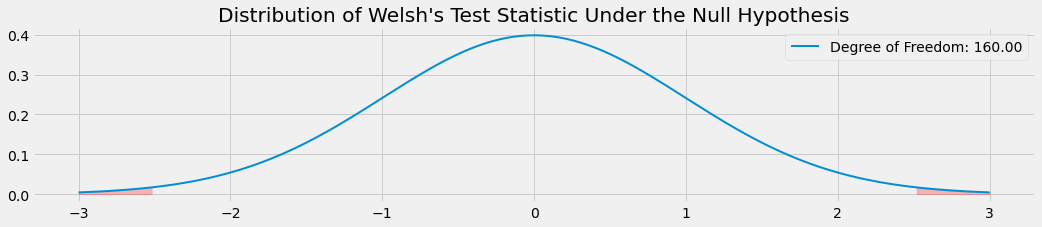

In [25]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis that 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros__obp_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros__obp_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

print(f"Astro's t-statistic is {astros__obp_ttest[0]}, and p-value is {astros__obp_ttest[1]}")

Astro's t-statistic is -2.4966025468643687, and p-value is 0.013551412067425373


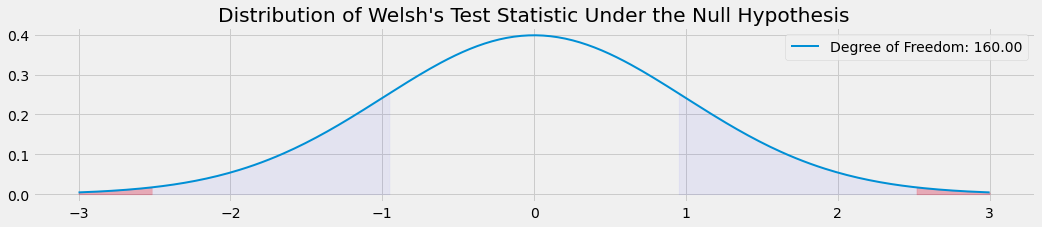

In [26]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
_ = ax.fill_between(x, curve.pdf(x), where=(x >= -astros__obp_ttest[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, curve.pdf(x), where=(x <= astros__obp_ttest[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, curve.pdf(x), where=(x >= .95), color="blue", alpha=0.05)
_ = ax.fill_between(x, curve.pdf(x), where=(x <= -.95), color="blue", alpha=0.05)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

print(f"Astro's t-statistic is {astros__obp_ttest[0]}, and p-value is {astros__obp_ttest[1]}")

In [27]:
#OBP for 2017 season
print(astros2017df.OBP.median())
print(yankees2017df.OBP.median())
print(dodgers2017df.OBP.median())
print(redsox2017df.OBP.median())

0.34600000000000003
0.34
0.341
0.335


In [28]:
#OBP for 2017 home games
print(astros_home_obp.mean())
# print(yankees_home_obp.mean())
# print(dodgers_home_obp.mean())
# print(redsox_home_obp.mean())

0.3400370370370371


In [29]:
#OBP for 2017 away games
print(astros_away_obp.mean())
# print(yankees_away_obp.mean())
# print(dodgers_away_obp.mean())
# print(redsox_away_obp.mean())

0.3463950617283951


In [30]:
#home.get_group(True).OBP.plot.line()

home:0.3400370370370371
away:0.3463950617283951


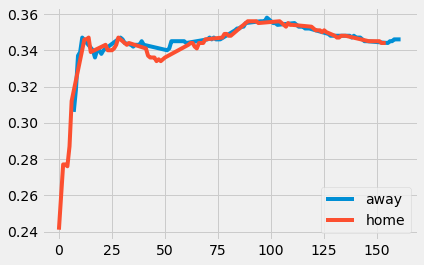

In [31]:
astros_away_obp.plot.line(label="away")
astros_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{astros_home_obp.mean()}')
print(f'away:{astros_away_obp.mean()}')


In [32]:
# yankees_away_obp.plot.line(label="away")
# yankees_home_obp.plot.line(label="home")
# plt.legend()
# print(f'home:{yankees_home_obp.mean()}')
# print(f'away:{yankees_away_obp.mean()}');

In [33]:
# dodgers_away_obp.plot.line(label="away")
# dodgers_home_obp.plot.line(label="home")
# plt.legend()
# print(f'home:{dodgers_home_obp.mean()}')
# print(f'away:{dodgers_away_obp.mean()}');

In [34]:
# redsox_away_obp.plot.line(label="away")
# redsox_home_obp.plot.line(label="home")
# plt.legend()
# print(f'home:{redsox_home_obp.mean()}')
# print(f'away:{redsox_away_obp.mean()}');

#### Is On Base Percentage (OBP) a rolling/weighted average? Can I parce HOME vs AWAY games? Should I consider a different stat like Strikeouts (SO)?

* ## SO advantage
fewer stikeouts/game
expect: astros to have fewer strikeouts than the field

In [35]:
# astros_home_so = astros_home_gb.get_group(True).SO
# astros_away_so = astros_home_gb.get_group(False).SO

In [36]:
# yankees_home_so = yankees_home_gb.get_group(True).SO
# yankees_away_so = yankees_home_gb.get_group(False).SO

In [37]:
# dodgers_home_so = dodgers_home_gb.get_group(True).SO
# dodgers_away_so = dodgers_home_gb.get_group(False).SO

In [38]:
# redsox_home_so = redsox_home_gb.get_group(True).SO
# redsox_away_so = redsox_home_gb.get_group(False).SO

In [39]:
# astros_home_so_desc = astros_home_so.describe()

In [40]:
#astros_home_so_desc

In [41]:
# print(astros_home_so.mean())
# print(yankees_home_so.mean())
# print(dodgers_home_so.mean())
# print(redsox_home_so.mean())

# list_field_home_so = [yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()]
# arr_field_home_so = np.array(list_field_home_so)

# print((astros_home_so.mean() - arr_field_home_so.mean()))

# arr_field_home_so.mean()


In [42]:
# print(astros_away_so.mean())
# print(yankees_away_so.mean())
# print(dodgers_away_so.mean())
# print(redsox_away_so.mean())

# list_field_away_so = [yankees_away_so.mean(), dodgers_away_so.mean(), redsox_away_so.mean()]
# arr_field_away_so = np.array(list_field_away_so)

# print((astros_home_so.mean() - arr_field_away_so.mean()))

# arr_field_away_so.mean()

some plot attempts

In [43]:
# plt.hist(astros_home_so)
# plt.hist(yankees_home_so)
# plt.hist(dodgers_home_so)
# plt.hist(redsox_home_so)
#print(abs(astros_home_so.mean() - yankees_home_so.mean()))
#plt.hist([astros_home_so.mean(), yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()])

In [44]:
# astros_home_so.plot.bar()
# yankees_home_so.plot.bar()
# abs(astros_home_so - yankees_home_so).plot.bar()

* ## SS/AB
new stat: strikeouts/at bats
expect to be lower than the field

In [45]:
astros_home_SoAb = astros_home_gb.get_group(True).SoAb
astros_away_SoAb = astros_home_gb.get_group(False).SoAb

In [46]:
astros2017_home_SoAb = astros2017_home_gb.get_group(True).SoAb
astros2017_away_SoAb = astros2017_home_gb.get_group(False).SoAb
astros2019_home_SoAb = astros2019_home_gb.get_group(True).SoAb
astros2019_home_SoAb = astros2019_home_gb.get_group(False).SoAb

In [47]:
print(astros_home_SoAb.mean())
print(astros_away_SoAb.mean())

0.18812175291296823
0.20336894774961192


In [48]:
# yankees_home_SoAb = yankees_home_gb.get_group(True).SoAb
# yankees_away_SoAb = yankees_home_gb.get_group(False).SoAb

In [49]:
# dodgers_home_SoAb = dodgers_home_gb.get_group(True).SoAb
# dodgers_away_SoAb = dodgers_home_gb.get_group(False).SoAb

In [50]:
# redsox_home_SoAb = redsox_home_gb.get_group(True).SoAb
# redsox_away_SoAb = redsox_home_gb.get_group(False).SoAb

In [51]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.scatter(astros2017df.SoAb, bins = 5,
# #            np.repeat(0, len(astros_home_SoAb)) + \
# #            np.random.normal(0, 0.1, len(astros_home_SoAb)), ## jitter
#            s=45)

# .set_yticks([0, 1])
# ax.set_yticklabels(["Home", "Away"]);

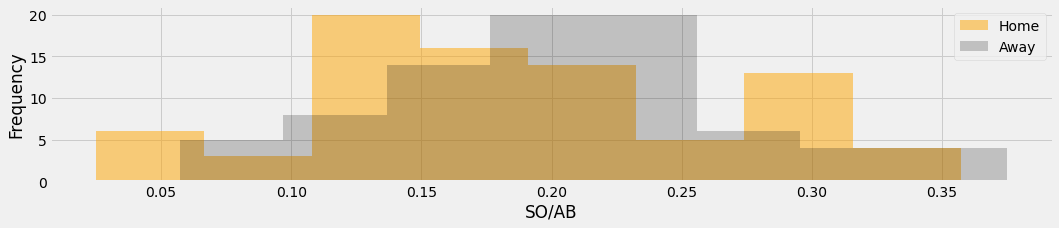

In [52]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros_home_SoAb, bins=8, label="Home", color="orange", alpha=.5)
ax.hist(astros_away_SoAb, bins=8, label="Away", color="black", alpha=.2)

plt.ylabel("Frequency")
plt.xlabel("SO/AB")

ax.legend();

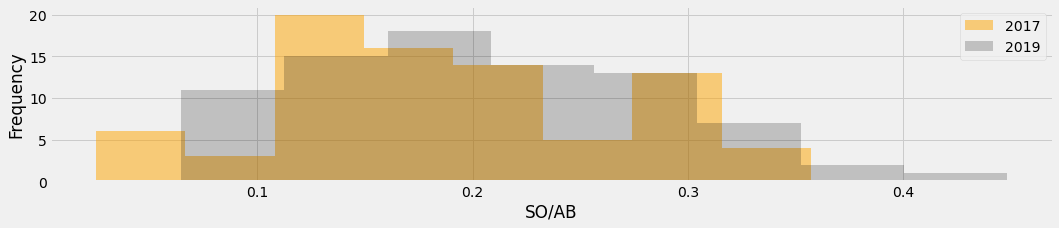

In [53]:
# SS/AB HOME 2017 vs. 2019
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros2017_home_SoAb, bins=8, label="2017", color="orange", alpha=.5)
ax.hist(astros2019_home_SoAb, bins=8, label="2019", color="black", alpha=.2)

plt.ylabel("Frequency")
plt.xlabel("SO/AB")

ax.legend();

In [54]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(yankees_home_SoAb, bins=20, label="Home", color="blue", alpha=.5)
# ax.hist(yankees_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [55]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(dodgers_home_SoAb, bins=20, label="Home", color="purple", alpha=.5)
# ax.hist(dodgers_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [56]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(redsox_home_SoAb, bins=20, label="Home", color="red",alpha=.5)
# ax.hist(redsox_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [57]:
# SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1,1)

# ax.hist(astros2017df.SoAb)
# ax.hist(astros_home_SoAb, bins=90)
# ax.hist(astros_away_SoAb, alpha=.5, bins=90)
# ax.hist(astros2017df.Date)
# ax.legend(["Home", "Away"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SS/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SS/AB between HOME and AWAY games.

In [58]:
# astros_test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(astros_test_statistic))
# yankees_test_statistic = welch_test_statistic(yankees_home_SoAb, yankees_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(yankees_test_statistic))
# dodgers_test_statistic = welch_test_statistic(dodgers_home_SoAb, dodgers_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(dodgers_test_statistic))
# redsox_test_statistic = welch_test_statistic(redsox_home_SoAb, redsox_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(redsox_test_statistic))

In [59]:
# astros_df = welch_satterhwaithe_df(astros_home_SoAb, astros_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(astros_df))
# yankees_df = welch_satterhwaithe_df(yankees_home_SoAb, yankees_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(yankees_df))
# dodgers_df = welch_satterhwaithe_df(dodgers_home_SoAb, dodgers_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dodgers_df))
# redsox_df = welch_satterhwaithe_df(redsox_home_SoAb, redsox_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(redsox_df))

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SO/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SO/AB between HOME and AWAY games.

# Run the t-test

In [60]:
astros_home2017away = stats.ttest_ind(astros_home_SoAb, astros_away_SoAb)

In [61]:
astros_2017home2019 = stats.ttest_ind(astros2017_home_SoAb, astros2019_home_SoAb)

Astro's t-statistic is -1.44239975945389, and p-value is 0.15114431189217845


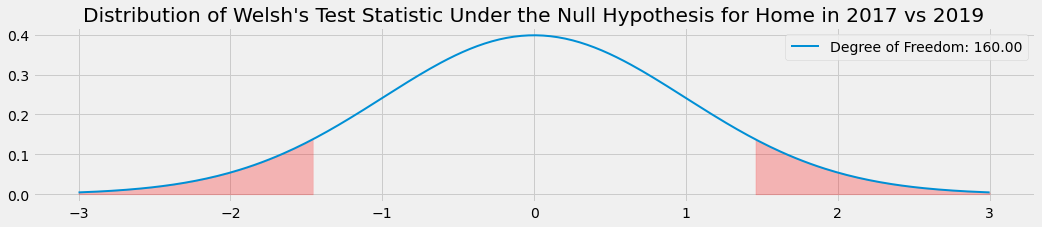

In [62]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_2017home2019[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_2017home2019[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home in 2017 vs 2019")

print(f"Astro's t-statistic is {astros_2017home2019[0]}, and p-value is {astros_2017home2019[1]}")


Astro's t-statistic is -1.2859019101726619, and p-value is 0.20033515512214123


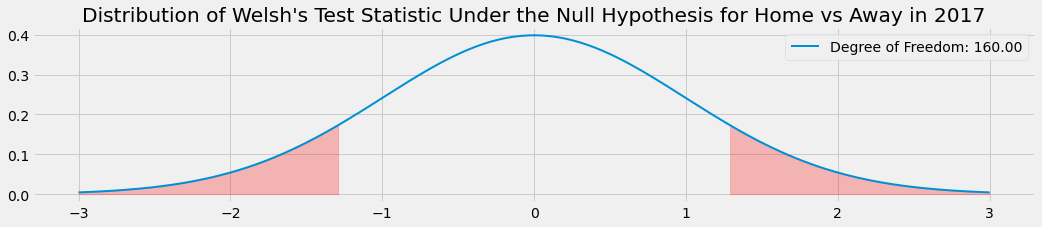

In [63]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_home2017away[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017")

print(f"Astro's t-statistic is {astros_home2017away[0]}, and p-value is {astros_home2017away[1]}")




In [64]:
# # p-val
# x = np.linspace(-3, 3, num=250)

# fig, ax = plt.subplots(1, figsize=(16, 3))
# students = stats.t(160) #stats.t_ind()
# ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
# _ = ax.fill_between(x, students.pdf(x), where=(x >= -astros[0]), color="red", alpha=0.25)
# _ = ax.fill_between(x, students.pdf(x), where=(x <= astros[0]), color="red", alpha=0.25)
# ax.legend()
# ax.set_title("p-value Reigon");

In [65]:
# astros_p_value = students.cdf(astros_test_statistic) + (1 + students.cdf(astros_test_statistic))
# print("p-value for different SS/AB: {:2.2f}".format(astros_p_value))
# yankees_p_value = students.cdf(-yankees_test_statistic) + (1 - students.cdf(yankees_test_statistic))
# print("p-value for different SS/AB: {:2.2f}".format(yankees_p_value))
# dodgers_p_value = students.cdf(-dodgers_test_statistic) + (1 - students.cdf(dodgers_test_statistic))
# print("p-value for different SS/AB: {:2.2f}".format(dodgers_p_value))
# redsox_p_value = students.cdf(-redsox_test_statistic) + (1 - students.cdf(redsox_test_statistic))
# print("p-value for different SS/AB: {:2.2f}".format(redsox_p_value))



In [66]:
# def welch_satterhwaithe_df(sample_1, sample_2):
#     ss1 = len(sample_1)
#     ss2 = len(sample_2)
#     df = (
#         ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
#         ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
#     )
#     return df

In [67]:
# welch_satterhwaithe_df(astros_home_SoAb, astros_away_SoAb)

In [68]:
# test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)

# p_value = 1 - students.cdf(test_statistic)
# print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

In [69]:
# print(astros_home_SoAb.mean())
# print(yankees_home_SoAb.mean())
# print(dodgers_home_SoAb.mean())
# print(redsox_home_SoAb.mean())

# list_field_home_soab = [yankees_home_SoAb.mean(), dodgers_home_SoAb.mean(), redsox_home_SoAb.mean()]
# arr_field_home_soab = np.array(list_field_home_soab)

# print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

# arr_field_home_soab.mean()

In [70]:
# print(astros_away_SoAb.mean())
# print(yankees_away_SoAb.mean())
# print(dodgers_away_SoAb.mean())
# print(redsox_away_SoAb.mean())

# list_field_away_soab = [yankees_away_SoAb.mean(), dodgers_away_SoAb.mean(), redsox_away_SoAb.mean()]
# arr_field_away_soab = np.array(list_field_away_soab)

# print((astros_away_SoAb.mean() - arr_field_away_soab.mean()))

# arr_field_home_soab.mean()

* ## BB/AB
EXPECT: astros to be higher than the field

In [71]:
astros_home_BbAb = astros_home_gb.get_group(True).BbAb
astros_away_BbAb = astros_home_gb.get_group(False).BbAb

In [72]:
astros2017_home_BbAb = astros2017_home_gb.get_group(True).BbAb
#astros2017_away_BbAb = astros2017_home_gb.get_group(False).BbAb
astros2019_home_BbAb = astros2019_home_gb.get_group(True).BbAb
#astros2019_home_BbAb = astros2019_home_gb.get_group(False).BbAb

In [73]:
# yankees_home_BbAb = yankees_home_gb.get_group(True).BbAb
# yankees_away_BbAb = yankees_home_gb.get_group(False).BbAb

In [74]:
# dodgers_home_BbAb = dodgers_home_gb.get_group(True).BbAb
# dodgers_away_BbAb = dodgers_home_gb.get_group(False).BbAb

In [75]:
# redsox_home_BbAb = redsox_home_gb.get_group(True).BbAb
# redsox_away_BbAb = redsox_home_gb.get_group(False).BbAb

# how do get these colors but "cheating years" are the same red shade

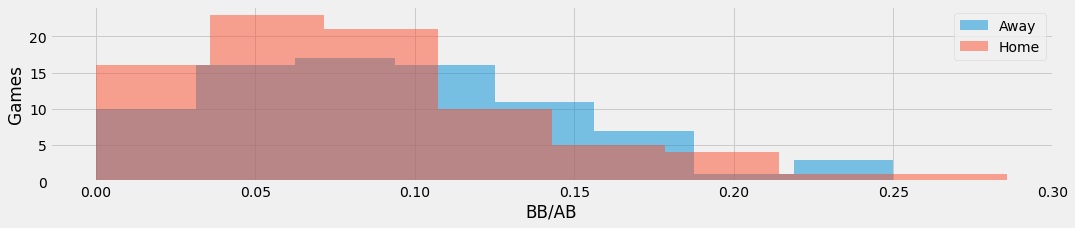

In [76]:
# SS/AB HOME vs. AWAY

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros_away_BbAb, bins=8, label="Away", alpha=.5)
ax.hist(astros_home_BbAb, bins=8, label="Home", alpha=.5)

plt.ylabel("Games")
plt.xlabel("BB/AB")

ax.legend();


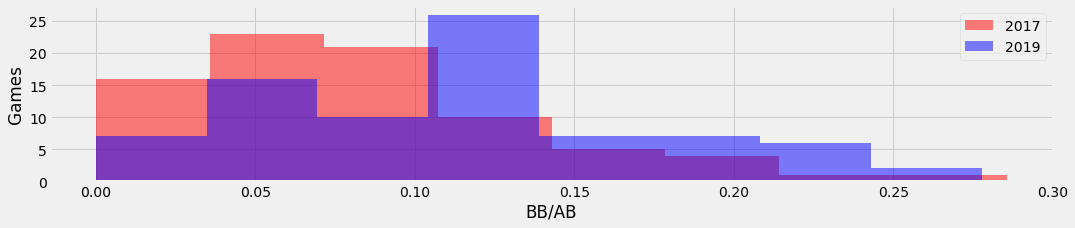

In [77]:
# SS/AB HOME 2017 vs 2019

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros2017_home_BbAb, bins=8, color="red", label="2017", alpha=.5)
ax.hist(astros2019_home_BbAb, bins=8, color="blue", label="2019", alpha=.5)

plt.ylabel("Games")
plt.xlabel("BB/AB")

ax.legend();


In [78]:
astros_SoAb_home2017away = stats.ttest_ind(astros_home_SoAb, astros_away_SoAb)

In [79]:
astros__SoAb_2017home2019 = stats.ttest_ind(astros2017_home_SoAb, astros2019_home_SoAb)

Astro's t-statistic is -1.2859019101726619, and p-value is 0.20033515512214123


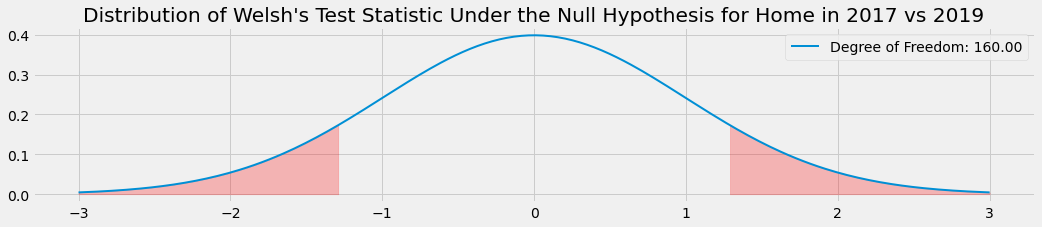

In [80]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_SoAb_home2017away[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_SoAb_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home in 2017 vs 2019")

print(f"Astro's t-statistic is {astros_SoAb_home2017away[0]}, and p-value is {astros_SoAb_home2017away[1]}")



Astro's t-statistic is -1.44239975945389, and p-value is 0.15114431189217845


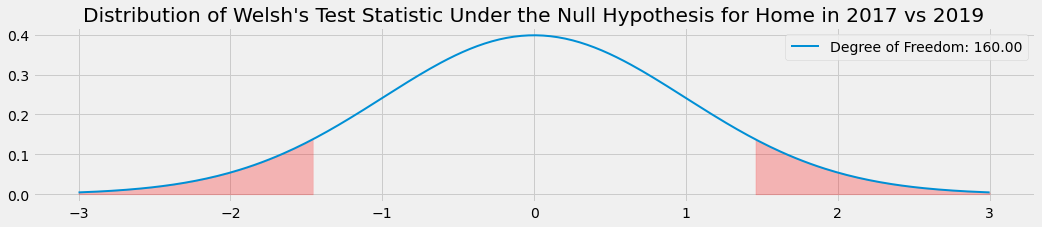

In [81]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros__SoAb_2017home2019[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros__SoAb_2017home2019[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home in 2017 vs 2019")

print(f"Astro's t-statistic is {astros__SoAb_2017home2019[0]}, and p-value is {astros__SoAb_2017home2019[1]}")


Astro's t-statistic is -1.2859019101726619, and p-value is 0.20033515512214123


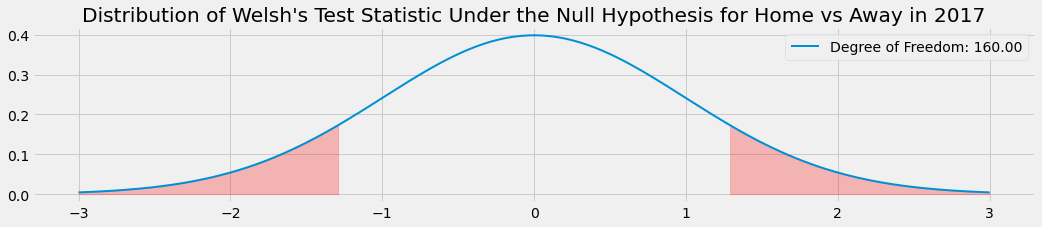

In [82]:


# Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_home2017away[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017")

print(f"Astro's t-statistic is {astros_home2017away[0]}, and p-value is {astros_home2017away[1]}")




In [83]:
# print(astros_home_BbAb.mean())
# print(yankees_home_BbAb.mean())
# print(dodgers_home_BbAb.mean())
# print(redsox_home_BbAb.mean())

# list_field_home_bbab = [yankees_home_BbAb.mean(), dodgers_home_BbAb.mean(), redsox_home_BbAb.mean()]
# arr_field_home_bbab = np.array(list_field_home_bbab)

# print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

# arr_field_home_bbab.mean()

In [84]:
# print(astros_away_BbAb.mean())
# print(yankees_away_BbAb.mean())
# print(dodgers_away_BbAb.mean())
# print(redsox_away_BbAb.mean())

# list_field_away_bbab = [yankees_away_BbAb.mean(), dodgers_away_BbAb.mean(), redsox_away_BbAb.mean()]
# arr_field_away_bbab = np.array(list_field_away_bbab)

# print((astros_away_BbAb.mean() - arr_field_away_bbab.mean()))

# arr_field_away_bbab.mean()

# GAME SCORE

In [85]:
#astros2017df['GmeSc'].unique()

In [86]:
#astros2017df['GmeSc'].str.extract('(\d+)')

In [87]:
#x.apply.astype(int) for x in astros2017df['GmeSc']

In [88]:
astros_home_GmeSc = astros_home_gb.get_group(True).GmeSc
astros_away_GmeSc = astros_home_gb.get_group(False).GmeSc

In [89]:
astros2017_home_GmeSc = astros2017_home_gb.get_group(True).GmeSc
#astros2017_away_GmeSc = astros2017_home_gb.get_group(False).GmeSc
astros2019_home_GmeSc = astros2019_home_gb.get_group(True).GmeSc
#astros2019_home_GmeSc = astros2019_home_gb.get_group(False).GmeSc


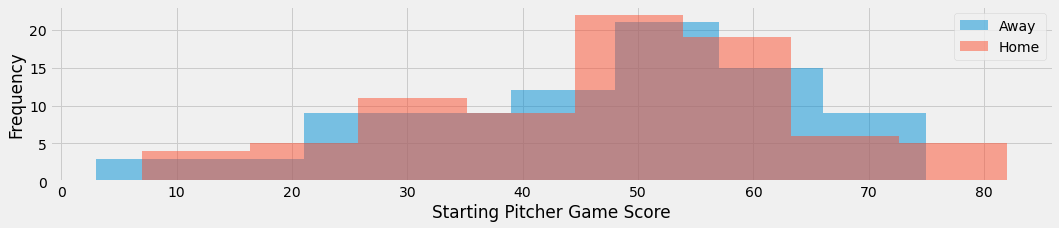

In [90]:
# Game Score HOME vs. AWAY

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros_away_GmeSc, bins=8, label="Away", alpha=.5)
ax.hist(astros_home_GmeSc, bins=8, label="Home", alpha=.5)

plt.ylabel("Frequency")
plt.xlabel("Starting Pitcher Game Score")

ax.legend();


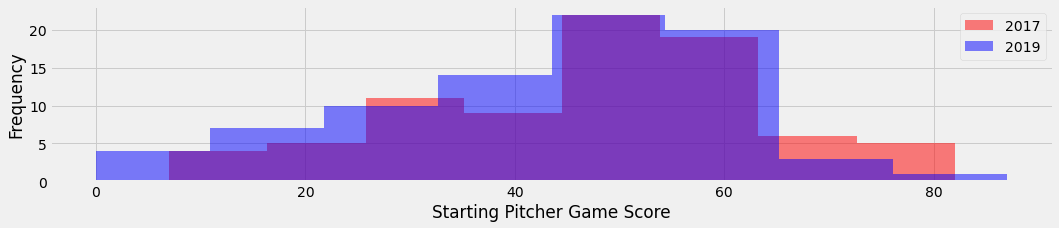

In [91]:
# SS/AB HOME 2017 vs 2019

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros2017_home_GmeSc, bins=8, color="red", label="2017", alpha=.5)
ax.hist(astros2019_home_GmeSc, bins=8, color="blue", label="2019", alpha=.5)

plt.ylabel("Frequency")
plt.xlabel("Starting Pitcher Game Score")

ax.legend();


In [93]:
astros_away_GmeSc.describe()

count    81.000000
mean     46.493827
std      17.196019
min       3.000000
25%      34.000000
50%      50.000000
75%      59.000000
max      75.000000
Name: GmeSc, dtype: float64

In [94]:
astros_GmeSc_home2017away = stats.ttest_ind(astros_home_GmeSc, astros_away_GmeSc)


In [95]:
astros__GmeSc_2017home2019 = stats.ttest_ind(astros2017_home_GmeSc, astros2019_home_GmeSc)
    

Astro's t-statistic is 0.33191325354369083, and p-value is 0.7403891503595055


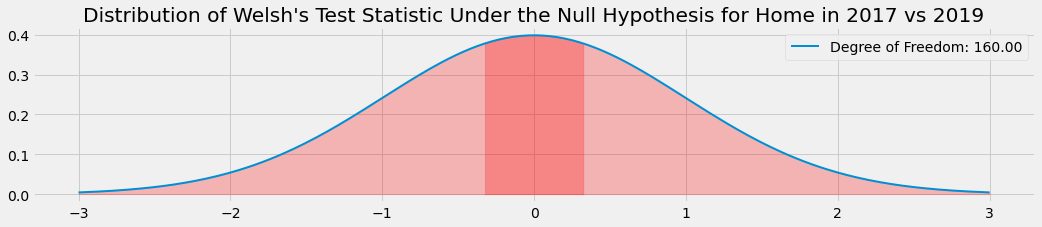

In [96]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_GmeSc_home2017away[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_GmeSc_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home in 2017 vs 2019")

print(f"Astro's t-statistic is {astros_GmeSc_home2017away[0]}, and p-value is {astros_GmeSc_home2017away[1]}")



Astro's t-statistic is 1.5797934174836716, and p-value is 0.11612909727992898


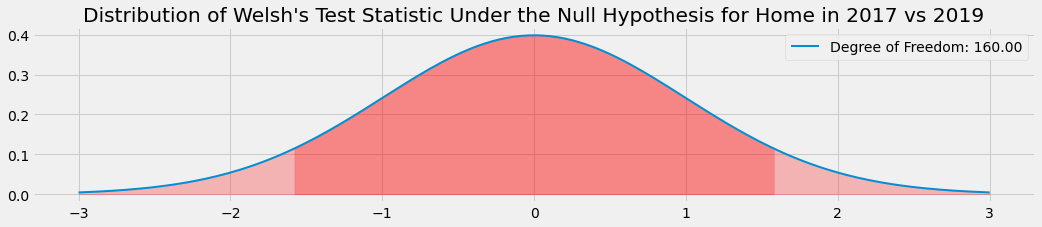

In [97]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros__GmeSc_2017home2019[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros__GmeSc_2017home2019[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home in 2017 vs 2019")

print(f"Astro's t-statistic is {astros__GmeSc_2017home2019[0]}, and p-value is {astros__GmeSc_2017home2019[1]}")


Astro's t-statistic is -1.2859019101726619, and p-value is 0.20033515512214123


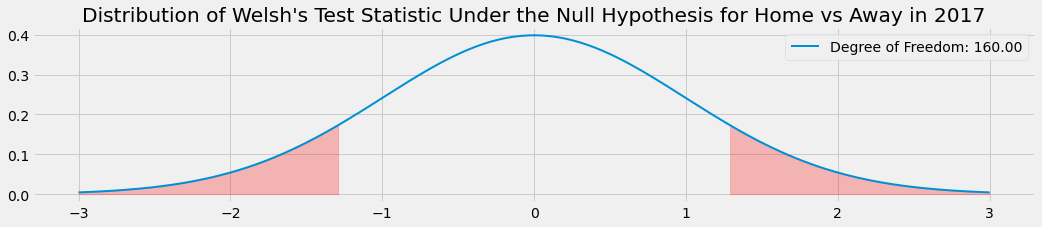

In [98]:


# Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros_home2017away[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for Home vs Away in 2017")

print(f"Astro's t-statistic is {astros_home2017away[0]}, and p-value is {astros_home2017away[1]}")


